In [9]:
import os
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
all_files = os.listdir("data")
hubbard_files = [f for f in all_files if "hubbard" in f and "out" in f and "hdf5" in f]
for f in hubbard_files:
    print(f)

hubbard_out_3_3.hdf5
hubbard_out_2_3.hdf5
hubbard_out_2_2.hdf5
hubbard_out_4_4.hdf5


In [11]:
records = []
for fname in hubbard_files:
    f = h5py.File(f"data/{fname}", "r")
    l1 = f["l1"][()]
    l2 = f["l2"][()]
    nsteps = f["num_steps"][()]
    gate_counts = f["gate_counts"][:]
    f.close()
    records.append((l1 * l2, nsteps, gate_counts[0], gate_counts[1]))
df = pd.DataFrame.from_records(records, columns=["size", "steps", "1q gates", "2q gates"])
print(df.head())

   size  steps  1q gates  2q gates
0     9      1       174       191
1     6      2       172       150
2     4      1        36        22
3    16      2       596       944


Text(0.5, 1.0, 'Fermi-Hubbard')

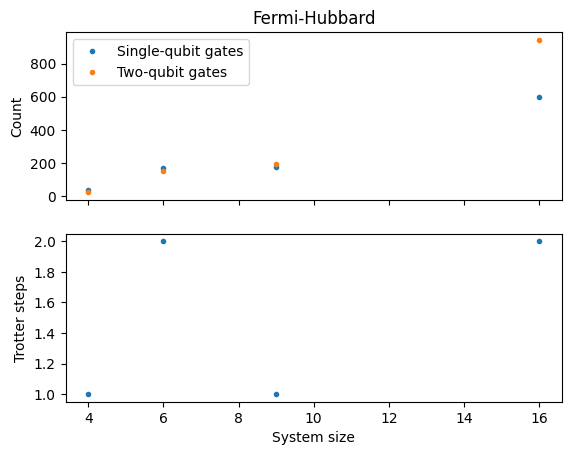

In [15]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df["size"], df["1q gates"], '.', label="Single-qubit gates")
ax[0].plot(df["size"], df["2q gates"], '.', label="Two-qubit gates")
ax[0].legend()
ax[0].set_ylabel("Count")
ax[1].plot(df["size"], df["steps"], '.', label="Trotter steps")
ax[1].set_xlabel("System size")
ax[1].set_ylabel("Trotter steps")
ax[0].set_title("Fermi-Hubbard")